In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df = pd.read_csv('/content/iris(For PCA Program) (1).csv')
print(df.shape)

(150, 5)


In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [20]:
# Standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
print(X_standardized.shape)

(150, 4)


In [21]:
# Calculate the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [22]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(eigenvalues)




[0.02085386 0.14774182 0.9201649  2.93808505]


In [27]:
# Sort eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print(eigenvectors)

[[-0.52106591  0.37741762  0.71956635  0.26128628]
 [ 0.26934744  0.92329566 -0.24438178 -0.12350962]
 [-0.5804131   0.02449161 -0.14212637 -0.80144925]
 [-0.56485654  0.06694199 -0.63427274  0.52359713]]


In [28]:
# Project the data onto the first two principal components
X_pca = X_standardized.dot(eigenvectors[:, :2])


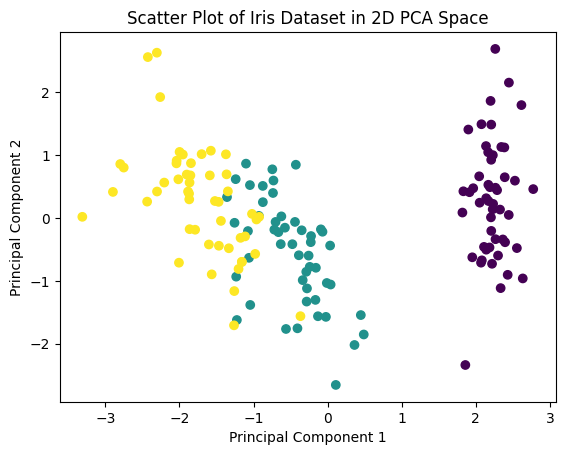

In [25]:
# Create a scatter plot
plt.scatter(X_pca[:,0], X_pca[:,1], c = y )
plt.title('Scatter Plot of Iris Dataset in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
